#Neural Network Classification with TensorFlow

A classification problem is where you try to classify something as one thing or another.

A few types of classification roblems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [ ]:
import tensorflow as tf
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# Create circles
X, Y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Checkout the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
Y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a litle hard to understand so lets visualize

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":Y}) # the creates a dataframe whose first column is of x0 (first column of X)
# second is x1 and last is label
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


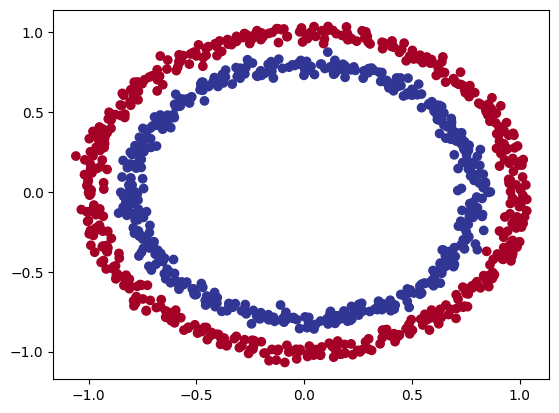

In [ ]:
# lets Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlBu)

## Input and Output Shapes

In [ ]:
X.shape, Y.shape

((1000, 2), (1000,))

## Steps in Modeling

In [ ]:
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(2)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
model.fit(X, Y, epochs=100, verbose=0)

In [ ]:
# Lets try improving our mdoel by training it for longer
model.fit(X, Y, epochs=200, verbose=0)

In [ ]:
model.evaluate(X, Y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.4880


[0.6931958794593811, 0.4880000054836273]

## Improving our Model

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]) # accuracy metrics litrally measures accuracy (out of 100 how many did model get right)

# 3. Fit the model
model_2.fit(X, Y, epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X, Y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.5000


[0.04765135794878006, 0.5]

To visualize our model, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, feature (X) and label (Y)
* Create a numpy meshgrid of the different X Values
* Make predictions accross the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls).

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X, Y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2.
  """

  # Define axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min()- 0.1, X[:, 0].max() + 0.1 # Adding and subtracting 0.1 to give ourselves some margin
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make preedictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    # we have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 1s 1ms/step
Doing binary classification


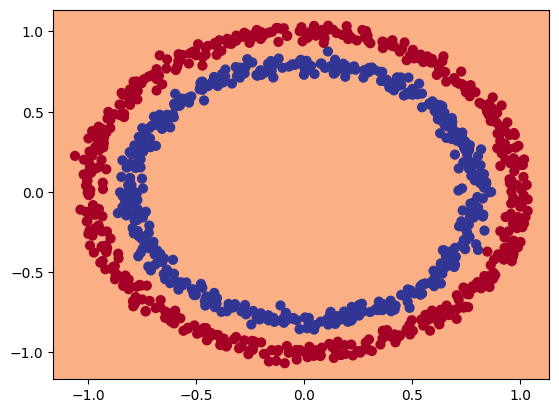

In [ ]:
plot_decision_boundary(model_2, X, Y)

In [ ]:
# Let's see if our model can be used for regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
Y_regression = tf.range(100, 1100, 5) # y = x + 100

# Split our egression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
Y_reg_train = Y_regression[:150]
Y_reg_test = Y_regression[150:]

# Fit our model to regression data
model_2.fit(tf.expand_dims(X_reg_train, axis=-1), Y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

The model above was created for binary Classification but... we are now working on regression problem.
So we have to suit it for regression problem by changing loss function.

In [ ]:
# setup the random seed
tf.random.set_seed(42)

# Creating the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compiling model with regression loss function
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# Fitting the model
model_2.fit(tf.expand_dims(X_reg_train, axis=-1), Y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 419.7762 - mae: 419.7762
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 303.3110 - mae: 303.3110
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 191.0138 - mae: 191.0138
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 75.0645 - mae: 75.0645
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 67.7045 - mae: 67.7045
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 88.8968 - mae: 88.8968
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 62.5810 - mae: 62.5810
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 44.1030 - mae: 44.1030
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 47.2255 - mae: 47.2255
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 42.1395 - mae: 42.1395
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 5ms/step


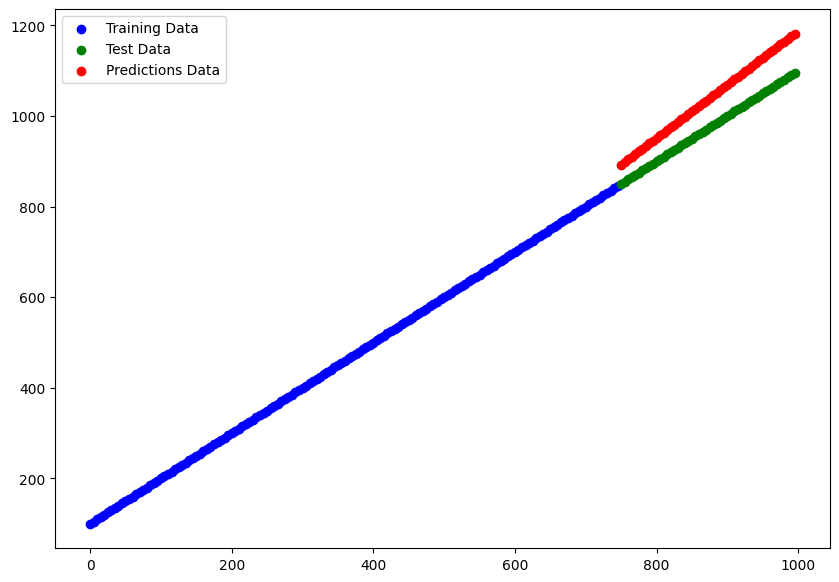

In [ ]:
# make predictions with our trained model
Y_reg_pred = model_2.predict(X_reg_test)

# Plot the model's prediction
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, Y_reg_train, c="b", label='Training Data')
plt.scatter(X_reg_test, Y_reg_test, c="g", label='Test Data')
plt.scatter(X_reg_test, Y_reg_pred, c="r", label='Predictions Data')
plt.legend()

## The Missing Piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# 3. Fit the model
history = model_3.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 6.2530 - accuracy: 0.4900
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 6.2457 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 6.2349 - accuracy: 0.4880
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 6.2125 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 6.2012 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1977 - accuracy: 0.4870
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 6.1960 - accuracy: 0.4870
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1945 - accuracy: 0.4870
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1931 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.1915 - accuracy: 0.4870
Epoch 11/

313/313 [==============================] - 0s 1ms/step
Doing binary classification


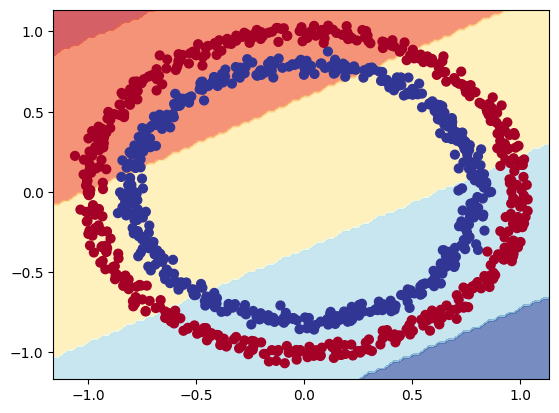

In [ ]:
# Check the decision boundary for our latest modle
plot_decision_boundary(model=model_3, X=X, Y=Y)

Lte's rebuild tour first neural network with a non-linear activation function.



In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu'),
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.4177 - accuracy: 0.4740
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3968 - accuracy: 0.4690
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3831 - accuracy: 0.4710
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3723 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3631 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3550 - accuracy: 0.4700
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 4.3186 - accuracy: 0.4720
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2512 - accuracy: 0.4700
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2076 - accuracy: 0.4720
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 4.2050 - accuracy: 0.4730
Epoch 11/

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

# 2. Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# 3. Fit the model
history = model_5.fit(X, Y, epochs=150, verbose=0)

In [ ]:
model_5.evaluate(X,Y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9940


[0.039146341383457184, 0.9940000176429749]

313/313 [==============================] - 0s 1ms/step
Doing binary classification


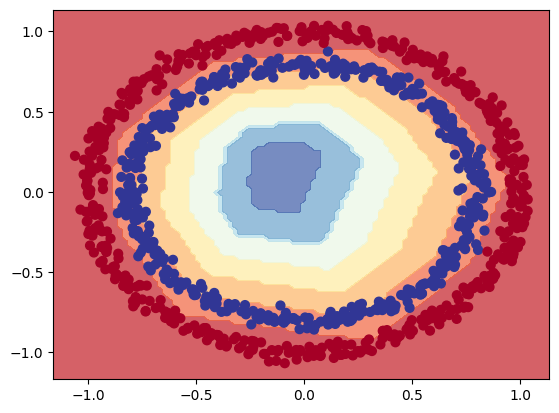

In [ ]:
# How do our model's predicions look?
plot_decision_boundary(model_5, X, Y)

The red color boundary means the model predicts the red dots should fall there.

The yellow boundary area is where model is unsure.

The blue is where model predicts Blue dots should fall.

In [ ]:
# Spliting data set
X_train, Y_train = X[:800], Y[:800]
X_test, Y_test = X[800:], Y[800:]

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_01 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_01.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"]) # accuracy metrics litrally measures accuracy (out of 100 how many did model get right)

# 3. Fit the model
history = model_01.fit(X_train, Y_train, epochs=50, verbose=1)

Epoch 1/50
25/25 [==============================] - 1s 4ms/step - loss: 0.6933 - accuracy: 0.4913
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5000
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.4988
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.4950
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.4988
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.4950
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.4975
Epoch 8/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6897 - accuracy: 0.5000
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6893 - accuracy: 0.5025
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6888 - accuracy: 0.5050
Epoch 11/50
25/25 [

In [ ]:
model_01.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.5114 - accuracy: 0.8500


[0.5113685131072998, 0.8500000238418579]

313/313 [==============================] - 0s 1ms/step
Doing binary classification
313/313 [==============================] - 0s 1ms/step
Doing binary classification


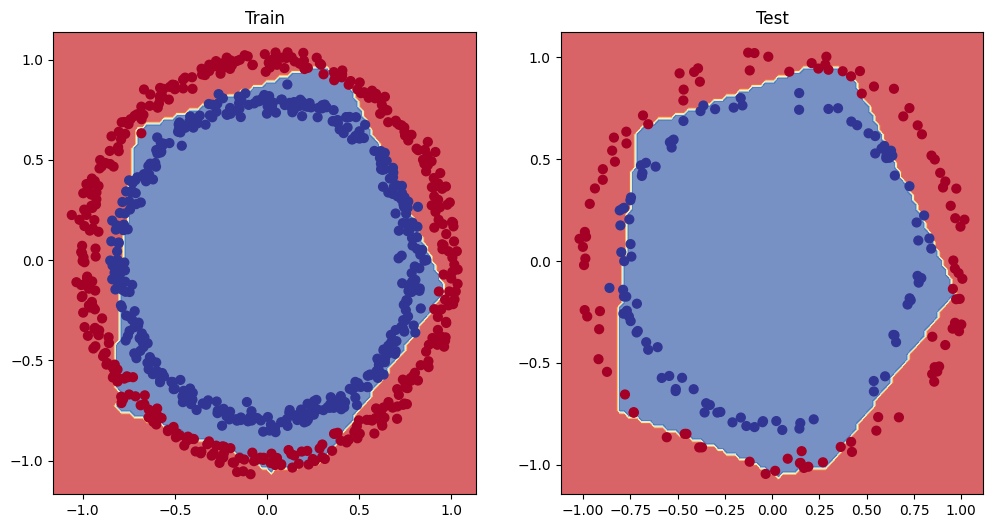

In [ ]:
# Visualizing the models prediction on training data
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_01, X_train, Y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_01, X_test, Y_test)

### TakeWay:
In the first few models we tried to teach our models by just giving them linear functions or in other words by giving them just straight lines and asked them to draw boundary b/w red and blue dots. which is difficult.

However, as soon as we gave models both linear(relu) and non-linear(sigmoid) functions in other words (straight lines and curves) the model was able draw boundary for the classification.

## Plot the Loss (or Training) curves

In [ ]:
# Convert our history oobject into DataFrame
pd.DataFrame(history.history).head()

,loss,accuracy
0,0.693344,0.49125
1,0.692511,0.50000
2,0.691857,0.49875
3,0.691392,0.49500
4,0.691013,0.49875


Text(0.5, 1.0, 'Model_01 loss curves')

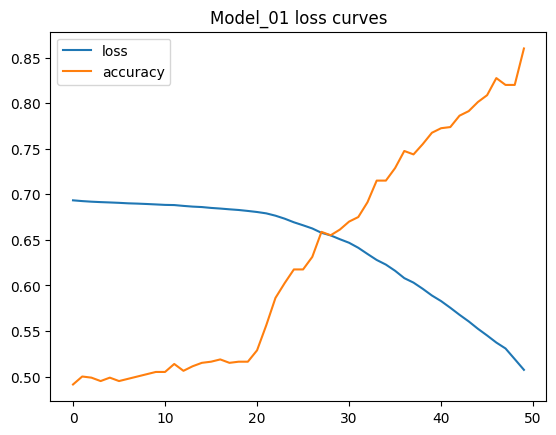

In [ ]:
# Plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("Model_01 loss curves")

## Finding the best learning rate

To find the ideal learning rate (The learning rate where the loss decreases
during training) we're going to use the following steps:
* A learning rate **Callback** - You can think of callback as an extra piece of
functionality, you can add to your model *while* its training.

In [ ]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_9.compile(loss='binary_crossentropy',
                optimizer='Adam',
                metrics=['accuracy'])

# Creating a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # lambda.. func will provide new lr for each epoch

# Fit the model (passing lr_schedular callback)
history_9 = model_9.fit(X_train, Y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 2s 4ms/step - loss: 0.6983 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6981 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6979 - accuracy: 0.5038 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6977 - accuracy: 0.5050 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.5025 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.4975 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6967 - accuracy: 0.4950 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

<Axes: xlabel='epochs'>

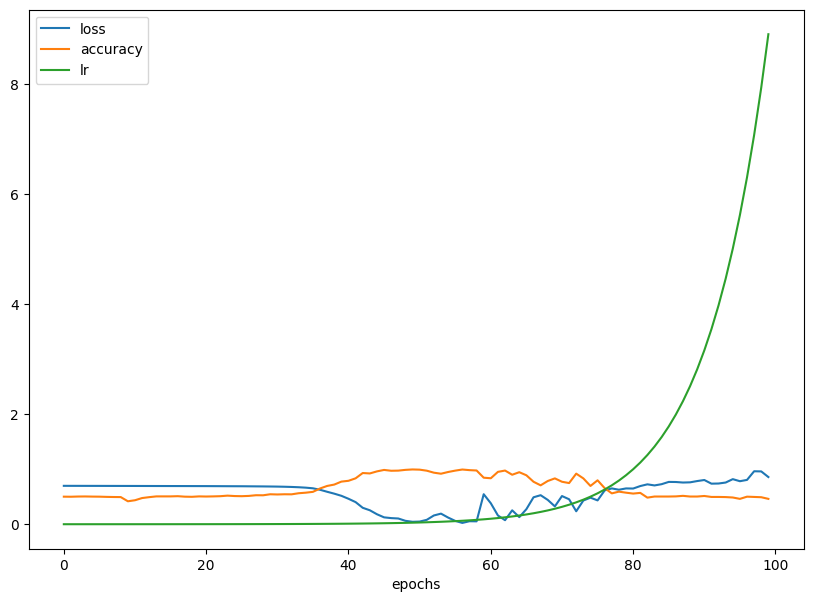

In [ ]:
# Checkout the hsitory
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel='epochs')

Notice around epoch 37, the loss is decreasing steadily at the respective learning rate.

Text(0.5, 1.0, 'Learnign rate vs loss')

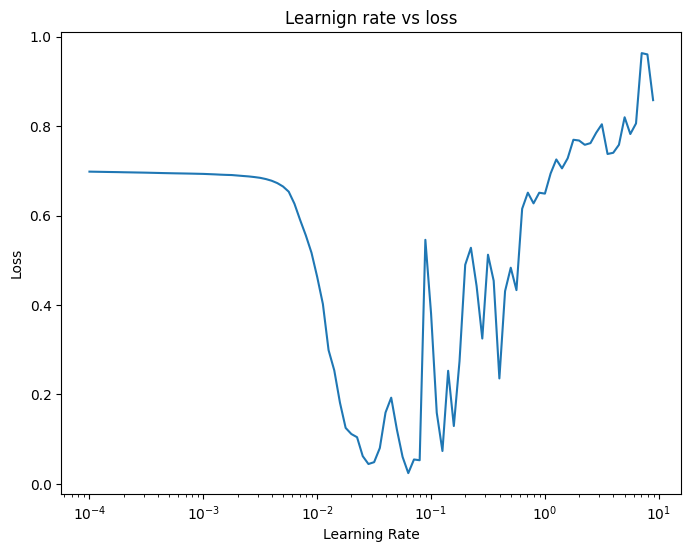

In [ ]:
# Plot the learning rate vs Loss
lrs = 1e-4 * (10 ** (tf.range(100)/20)) # 100 cuz we ran 100 epochs
plt.figure(figsize=(8, 6))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel('Learning Rate')
plt.ylabel("Loss")
plt.title('Learnign rate vs loss')

## How about a Confusion Matrix?

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# make predictions
Y_preds = model_01.predict(X_test)

# Create a confusion matrix
confusion_matrix(Y_test, tf.round(Y_preds))

NameError: ignored

## Prettifying Confusion matrix

In [ ]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix


def conf_matrix(Y_test, Y_preds):
  figsize = (6, 6)

  # Create the confusion matrix
  cm = confusion_matrix(Y_test, tf.round(Y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

  # Create classes
  classes = False

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(20)
  ax.yaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=15)

conf_matrix(Y_test=Y_test, Y_preds=Y_preds)

NameError: ignored

# Multi-class Classification

To practice multi-class classification, we're going to build a neural network to classify image of different clothing items.


We will import fashion dataset from [tensorflow datasets](https://www.tensorflow.org/datasets/catalog/overview) for image classification.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets
(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training Label:\n{train_label[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Shape of a single example
train_data.shape, train_label.shape

((60000, 28, 28), (60000,))

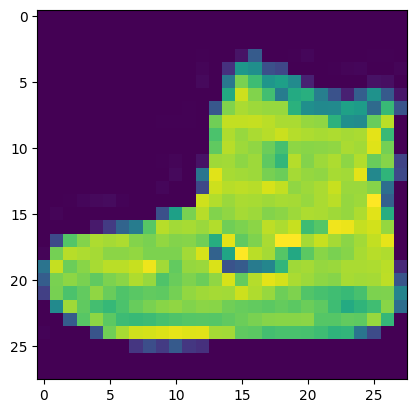

In [ ]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
# Creating list to index our training labels for human readability
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress",	"Coat", "Sandal",
               "Shirt",	"Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'T-shirt/Top')

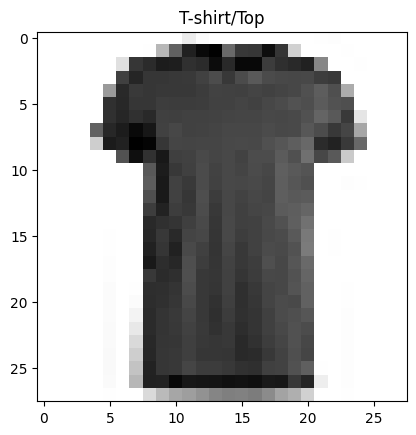

In [ ]:
# Ploting an other example
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_label[index_of_choice]])

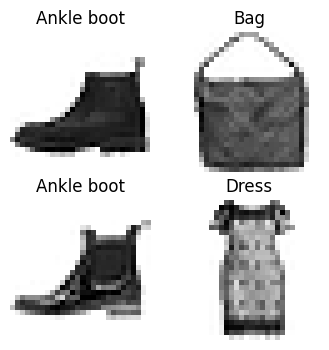

In [ ]:
# PLot multiple random images of Fashiom MNIST
import random
plt.figure(figsize=(4, 4))
for i in range(4):
  ax = plt.subplot(2, 2, 1+i)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_label[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

* Input shape: 28 x 28 (the shape of one image)
* Output shape: 10 (one per class of clothing)
* Loss function: `tf.keras.losses.CatagoricalCrossentropy()` if labels are in `one-hot` representation, else use `SparseCategoricalCrossentropy()`.
* Output layer activation: Softmax (not sigmoid)

## Flatten the shape of the input

In [ ]:
# Our data needs to be flatten from 28*28 to (None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [ ]:
tf.one_hot(train_label, depth=10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

> 👀 Use `SparseCategoricalCrossentropy()` loss function as the labels are integers not in `one-hot` representation.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Create the model
non_norm_history = model_11.fit(train_data, tf.one_hot(train_label, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_label, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 15s 5ms/step - loss: 2.5459 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3033 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accura

In [ ]:
# Check the model summary
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


## Normalizing the data

Neural networks prefer data to be scaled (or normalized), this means the like to have numbers in the tensors they try to find patterns between 0 & 1.

In [ ]:
# Normalizing the data
train_data_norm = train_data/train_data.max()
test_data_norm = test_data/test_data.max()

In [ ]:
# Creating the model again but this time only change is that the data is normalized

# set the random seed
tf.random.set_seed(42)

# create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # output layer
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
norm_history = model_12.fit(train_data_norm, train_label, epochs=20, validation_data=(test_data/255, test_label))

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 1.0993 - accuracy: 0.5984 - val_loss: 0.7865 - val_accuracy: 0.7157
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7239 - accuracy: 0.7323 - val_loss: 0.7127 - val_accuracy: 0.7477
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6668 - accuracy: 0.7515 - val_loss: 0.6737 - val_accuracy: 0.7603
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6336 - accuracy: 0.7617 - val_loss: 0.6522 - val_accuracy: 0.7654
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6150 - accuracy: 0.7674 - val_loss: 0.6477 - val_accuracy: 0.7671
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5966 - accuracy: 0.7806 - val_loss: 0.6206 - val_accuracy: 0.7885
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5769 - accuracy: 0.7936 - val_loss: 0.6056 - val_accuracy

<Axes: title={'center': 'Normalized Data'}>

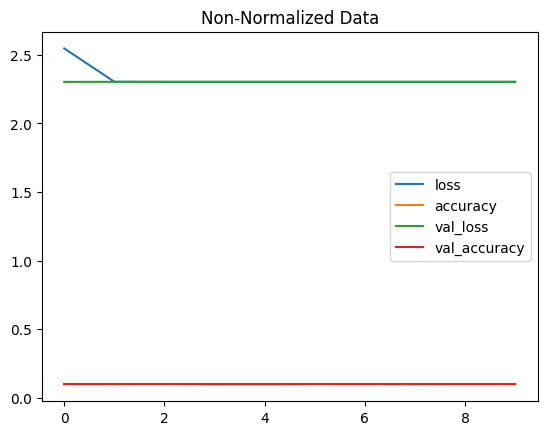

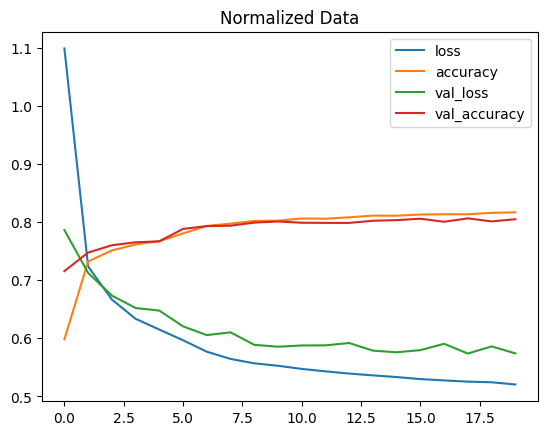

In [ ]:
import pandas as pd
# PLot the non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized Data")

# PLot normalized Data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

## Finding the ideal learning rate

In [ ]:
# set the seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compile the model
model_12.compile(loss='SparseCategoricalCrossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Creating Learning rate schedular
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model with Callback
find_lr_history = model_12.fit(train_data_norm, train_label, callbacks=[lr_schedular], epochs=40, validation_data=(test_data/255, test_label))

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4942 - accuracy: 0.8292 - val_loss: 0.5500 - val_accuracy: 0.8122 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4943 - accuracy: 0.8280 - val_loss: 0.5767 - val_accuracy: 0.8036 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4951 - accuracy: 0.8285 - val_loss: 0.5735 - val_accuracy: 0.8001 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4944 - accuracy: 0.8296 - val_loss: 0.5582 - val_accuracy: 0.8089 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4970 - accuracy: 0.8273 - val_loss: 0.5483 - val_accuracy: 0.8155 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4968 - accuracy: 0.8278 - val_loss: 0.5671 - val_accuracy: 0.8060 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

In [ ]:
# PLoting the learning rate decay curve
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.ylabel("Loss")
plt.xlabel("Learning Rate")
plt.title("Learning rate decay Curve")

NameError: ignored

Turns out the ideal learning rate is the defaul one in this case. (model_12 used lr=0.001)

## Creating confusion matrix

In [ ]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(Y_true, Y_pred, classes=None, figsize=(6, 6), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(Y_true, Y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
  fig.colorbar(cax)

# set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.xaxis.label.set_size(text_size)
  ax.yaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)


In [ ]:
y_probs = model_12.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[8.74399362e-08, 1.60179231e-10, 3.19247802e-14, 1.09025219e-10,
        1.18181931e-11, 8.97069126e-02, 4.76859974e-09, 2.07883954e-01,
        5.48769967e-05, 7.02354193e-01],
       [6.58461649e-05, 3.09548005e-16, 8.92095745e-01, 4.35201619e-05,
        5.85332774e-02, 2.16822901e-14, 4.92595099e-02, 3.58688132e-21,
        2.11746919e-06, 3.59385264e-36],
       [9.49907699e-05, 9.95658159e-01, 1.82992554e-09, 4.24506888e-03,
        1.52065098e-07, 6.93580139e-22, 1.34101981e-06, 0.00000000e+00,
        1.83525955e-07, 1.76344298e-14],
       [5.21188394e-06, 9.98131335e-01, 4.16107912e-11, 1.86328194e-03,
        2.15263682e-08, 2.52026222e-26, 5.40140626e-08, 0.00000000e+00,
        1.32069564e-08, 4.88368923e-17],
       [6.22840166e-01, 9.90436762e-04, 3.83630395e-02, 2.30629053e-02,
        1.39345019e-03, 2.98660016e-04, 3.10652047e-01, 5.82957684e-12,
        2.39928463e-03, 1.23352555e-08]], dtype=float32)

> 🔑 **Note:** Make sure to make predictions on the same kind of data your model was trained on (e.g. if the model was trained on **normalized** Data, it should be evaluated on **normalized** data).

In [ ]:
y_probs[0] # these are the prediction probabilities for objects on a single given input

array([8.7439936e-08, 1.6017923e-10, 3.1924780e-14, 1.0902522e-10,
       1.1818193e-11, 8.9706913e-02, 4.7685997e-09, 2.0788395e-01,
       5.4876997e-05, 7.0235419e-01], dtype=float32)

In [ ]:
tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])] # finding the index of maximum probability of an object

(<tf.Tensor: shape=(), dtype=int64, numpy=9>, 'Ankle boot')

In [ ]:
# Convert all of the probabilities into integers
y_preds = y_probs.argmax(axis=1)

y_preds[:10]

array([9, 2, 1, 1, 0, 1, 4, 6, 5, 7])

In [ ]:
test_label[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_label, y_pred=y_preds)

array([[775,   3,  17,  82,   2,   5, 100,   0,  16,   0],
       [  7, 932,   1,  49,   4,   0,   6,   0,   1,   0],
       [ 19,   1, 663,  19, 157,   0, 136,   0,   5,   0],
       [ 37,   5,  19, 860,  34,   1,  32,   0,  12,   0],
       [  1,   0,  94,  49, 693,   0, 152,   0,  11,   0],
       [  7,   0,   0,   1,   0, 876,   3,  65,  11,  37],
       [158,   1, 127,  70,  72,   9, 539,   0,  24,   0],
       [  0,   0,   0,   0,   0,  85,   0, 880,   1,  34],
       [  0,   0,   3,  10,   2,  13,  49,   5, 918,   0],
       [  0,   0,   0,   0,   0,  29,   0,  55,   1, 915]])

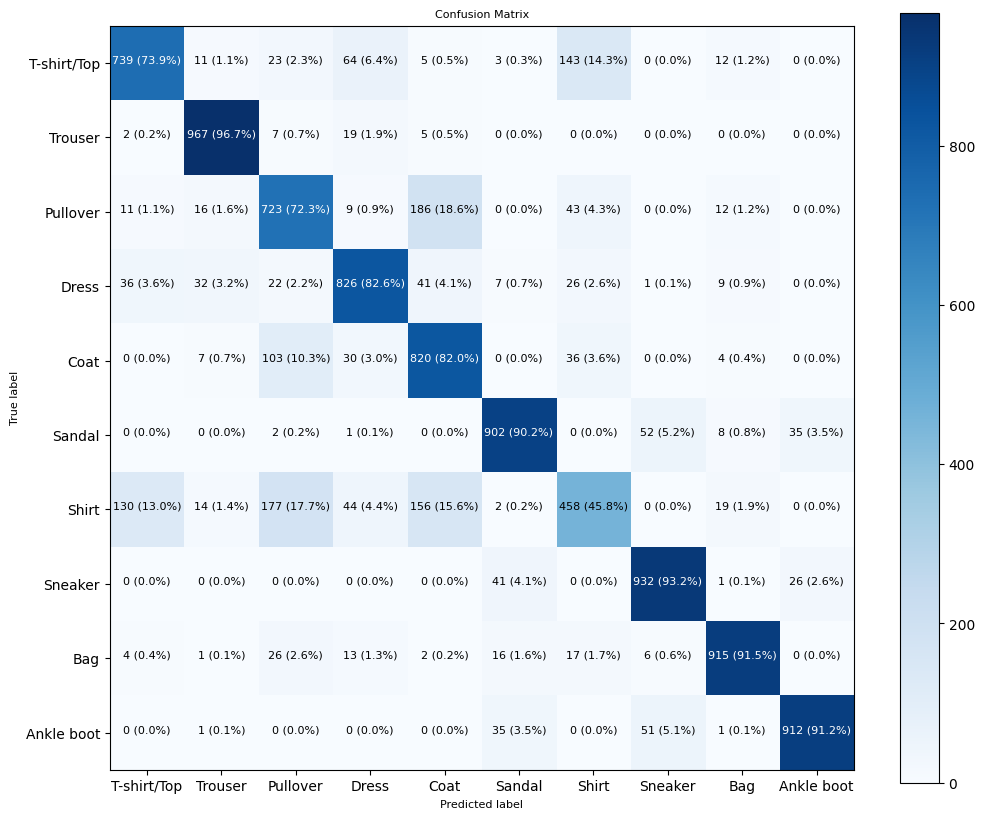

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(Y_true=test_label, Y_pred=y_preds, classes=class_names, figsize=(12, 10), text_size=8)

> 🔑 **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible.

How about creating a fun little function for:
* PLot a random image
* Make prediction on said image
* Label the plot with truth & predicted label

In [ ]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  # set up a random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # making sure our image is in the right shape.
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 [==============================] - 0s 20ms/step


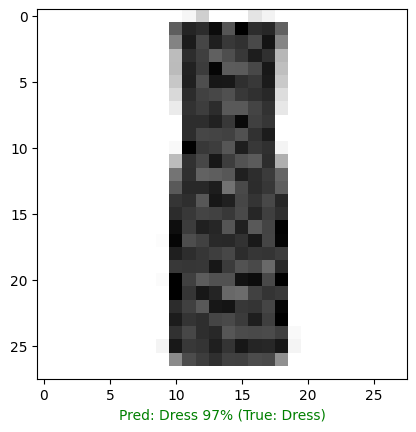

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_12,
                 images=test_data_norm, # always make predictions on the same kind of data on which trained.
                 true_labels=test_label,
                 classes=class_names)

## What Patterns is our model Learning

In [ ]:
# Inspecting layer of the model
model_12.layers

In [ ]:
# Extract a particular layer
model_12.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_12.layers[1].get_weights()

# shapes
weights , weights.shape

(array([[-0.89459497, -0.5196781 ,  0.53879356, -0.14890547],
        [-0.6212463 , -0.16096705,  0.51231813, -0.8824259 ],
        [-0.9387288 ,  0.25024247,  0.351164  ,  0.15161735],
        ...,
        [-0.24887715,  0.11059721, -0.00224268, -0.1843637 ],
        [ 0.10156074, -0.4064323 , -0.67972374, -0.06756173],
        [-0.23851857, -0.67426306,  0.4293407 , -0.05444468]],
       dtype=float32),
 (784, 4))

In [ ]:
model_12.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 3140      
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


> 👀🔑 So for each data point in our input tensor (784 pixel scales) our weights matrix has four parameters to learn snd adjust to find patterns in these 784 numbers.

In [ ]:
# Let's chec out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# see the inputs and outputs of each layer
plot_model(model_12, show_shapes=True)